<a href="https://colab.research.google.com/github/condusinew/vaccine_failure_escape/blob/main/SIR_simplest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

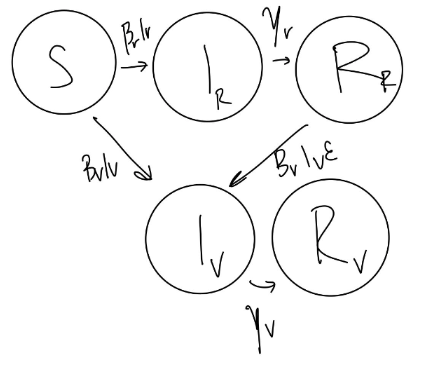

$\frac{\mathrm{d}S}{\mathrm{d}t} = -(\beta_r I_r + \beta_v I_v)S$

$\frac{\mathrm{d}I_r}{\mathrm{d}t} = \beta_r I_r S - \gamma_r I_r$

$\frac{\mathrm{d}R_r}{\mathrm{d}t} = \gamma_rI_r - \beta_v I_v \epsilon R_r$

$\frac{\mathrm{d}I_v}{\mathrm{d}t} = \beta_r I_r S + \beta_v I_v \epsilon R_r - \gamma_v I_v$

$\frac{\mathrm{d}I_v}{\mathrm{d}t} = \gamma_v I_v$

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [32]:
# SIR model equations
def SIR_model_rv(y, t, epsilon, betar, gammar, betav, gammav):
    S, Ir, Rr, Iv, Rv = y
    dSdt = -(betar*Ir + betav*Iv) * S
    dIrdt = betar * Ir * S - gammar * Ir
    dRrdt = gammar * Ir - betav*Iv*epsilon*Rr
    dIvdt = betav*Iv*S + betav*Iv*epsilon*Rr - gammav * Iv
    dRvdt = gammav * Iv
    return [dSdt, dIrdt, dRrdt, dIvdt, dRvdt]

In [57]:
# set parameter values
Rrnaught = 2
gammar = 1/4
betar = Rrnaught * gammar

Rvnaught = 2
gammav = 1/4
betav = Rvnaught * gammav

epsilon = 0.6

# set initial conditions
S0 = 0.75
Ir0 = 0.20
Rr0 = 0

Iv0 = 0.05 #need to get this seeded later
Rv0 = 0

y0 = [S0, Ir0, Rr0, Iv0, Rv0]

# Time vector
t = np.linspace(0, 200, 200)  # simulate for t

# Solve the SIR model equations using odeint()
solution = odeint(SIR_model_rv, y0, t, args=(epsilon, betar, gammar, betav, gammav))


ODEINT VS SOLVE IVP


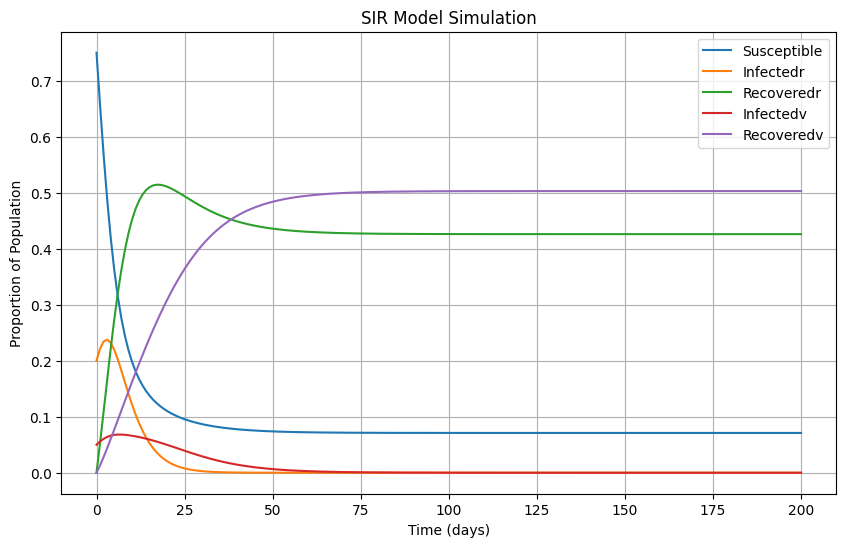

In [58]:
# Extract results
S, Ir, Rr, Iv, Rv = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, Ir, label='Infectedr')
plt.plot(t, Rr, label='Recoveredr')
plt.plot(t, Iv, label='Infectedv')
plt.plot(t, Rv, label='Recoveredv')

plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.title('SIR Model Simulation')
plt.legend()
plt.grid(True)
plt.show()